<center><h1 class="list-group-item list-group-item-success">Twitter Sentiment Analysis</h1></center>

<center><img src = "https://res.cloudinary.com/qna/image/upload/v1635170410/sentiment-points.a502b2c_pyfy2i.png" width = 500></center>

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h style = "color:#fff"><font size = 4>Problem Statement</font></h4>
    </strong>
</div><br>
<font size = 3.9>Using NLP approach for Sentiment analysis on the Twitter dataset. The objective is to recognize whether the given tweet by the is negative (-1), neutral (0), or positive (1).</font>




<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h style = "color:#fff"><font size = 4>Data Overview</font></h4>
    </strong>
</div><br>
<font size = 3.5>The dataset contains information about<br><br>
    <font>
        <ol>
    <li>Tweet - Message</li><br>
    <li>Label - Sentiment for the tweet</li>
        </ol>
    </font>
</font>
<font size = 3.9>Sentiment analysis studies the subjective information in an expression, that is, the opinions, appraisals, emotions, or attitudes towards a topic, person or entity.The dataset has three sentiments namely, negative(-1), neutral(0), and positive(+1).</font>


<div style="background:#c72e57;color:#fff;padding:1em 1em 1.5em 1em;border-radius: 3px;font-weight:bold">
    <strong>
        <h style = "color:#fff"><font size = 4>Contents</font></h4>
    </strong>
</div>
<font size = 3.5>
    <ol>
    <br><br><li>Importing Packages</li><br>
    <li>Importing Data</li><br>
    <li>Analysing Data</li><br>
        <ol> <font>
            <li> Data Overview</li>
            <li> Checking for NA</li>
            <li> Finding out Distribution of different sentiments </li>
            </font></ol><br>
    <li>Data Visualization</li><br>
        <ol> <font>
            <li> Distribution of different sentiments</li>
            <li> Word cloud on different sentiments</li>
            </font></ol><br>
    <li>Data Preprocessing</li><br>
        <ol> <font>
            <li> Tokenization</li>
            <li> Removing unnecessary punctuation, tags</li>
            <li>Converting all letters to lower case</li>
            <li>Stemming</li>
            </font></ol><br>
    <li>Feature Extraction</li><br>
         <ol> <font>
            <li> Bag of words</li>
            <li> TF-IDF Vectorizer</li>
            </font></ol><br>
    <li>Training Models</li><br>
         <ol> <font>
            <li>Naive Bayes</li>
            <li>Logistic Regression</li>
            </font></ol><br>
    <li>Evaluation Metrics</li><br>
    <li>Clustering</li><br>
    <li>Sequential Modelling</li><br>
    <li>Predictions</li><br>
    </ol>
</font>

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h style = "color:#fff"><font size = 4>1. Importing Packages</font></h4>
    </strong>
</div>

In [ ]:
# Importing Essential Packages
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import urllib.request
import re
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from gensim.models import Word2Vec
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,Input,SpatialDropout1D, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow import keras
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE
import seaborn as sns

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h style = "color:#fff"><font size = 4>2. Importing Data</font></h4>
    </strong>
</div>

In [ ]:
# Reading Data
df = pd.read_csv('Twitter_Data.csv',nrows=10000)

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h style = "color:#fff"><font size = 4>3. Analysing Data</font></h4>
    </strong>
</div>


In [ ]:
# Data Sample
df.sample(5)

,clean_text,category
3763,its time for modi give humble walkover and lea...,-1
5128,soul says rahul unfit will vote modi its congr...,1
1711,modi sir pls help humne packer mover book kiya...,0
8271,rahul gandhi like that ayyash launda the famil...,-1
964,country has given years the congress all know ...,-1


In [ ]:
# Checking for NA Values
df.isnull().sum()

clean_text    1
category      0
dtype: int64

In [ ]:
# Distribution of different classes in sentiment
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
count_values_in_column(df,"category")

,Total,Percentage
1,4153,41.53
0,3477,34.77
-1,2370,23.70


### **Data Insights**
<font size = 4><ul>
    <li>In this data, we have more than 40% positive tweets</li>
    <li>Negative Tweets are with low numbers as compared to positive tweets</li>
    <li>Neutral Tweets have a good number in total</li></ul>
</font>

In [ ]:
# Segrating based on different sentiments
df_negative = df[df["category"]==-1]
df_positive = df[df["category"]==1]
df_neutral = df[df["category"]==0]

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h style = "color:#fff"><font size = 4>4. Data Visualization</font></h4>
    </strong>
</div>


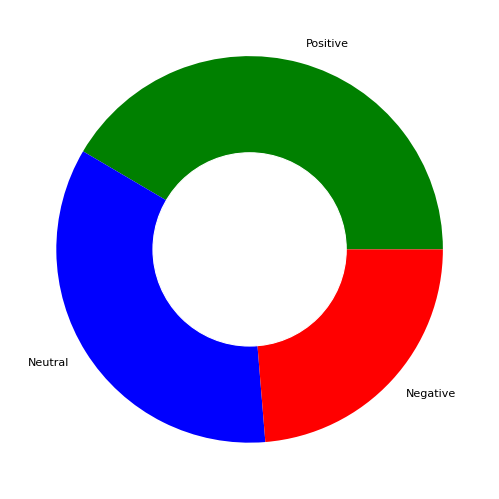

In [ ]:
# create data for Pie Chart
plt.figure(figsize=(13, 8), dpi=80)
pichart = count_values_in_column(df,"category")
names= ["Positive","Neutral","Negative"]
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['green','blue','red',"yellow"])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### **Most common words**

In [ ]:
from collections import Counter
df['temp_list'] = df['clean_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,modi,9212
1,the,6299
2,and,4045
3,for,3368
4,you,2362
5,will,2093
6,this,1880
7,not,1780
8,are,1712
9,that,1690


In [ ]:
import plotly.express as px
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
# Function to Create Wordcloud
def create_wordcloud(text,path):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    max_words=3000,
    stopwords=stopwords,
    random_state=42,
    width=900, height=500,
    repeat=True)
    wc.generate(str(text))
    wc.to_file(path)
    print("Word Cloud Saved Successfully")
    path=path
    display(Image.open(path))

### **WordCloud**


Word Cloud Saved Successfully


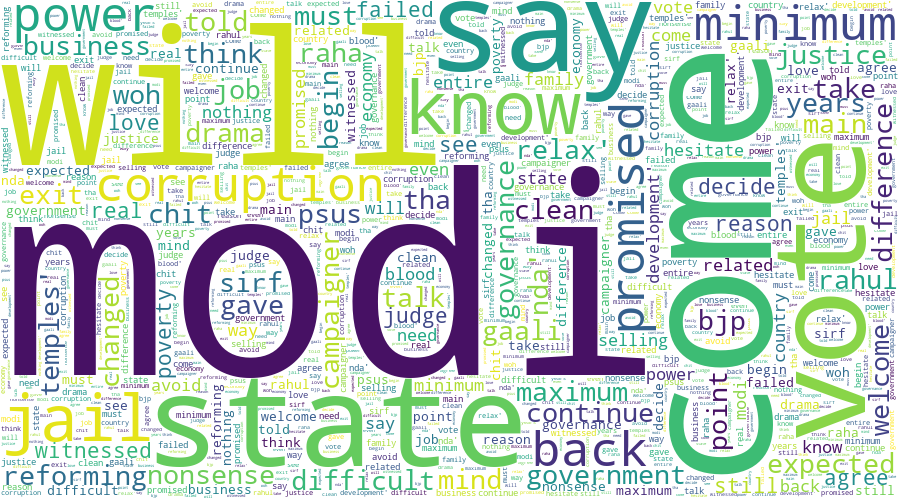

<Figure size 1200x640 with 0 Axes>

In [ ]:
# Wordcloud for all tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df['clean_text'].values,"all.png")

Word Cloud Saved Successfully


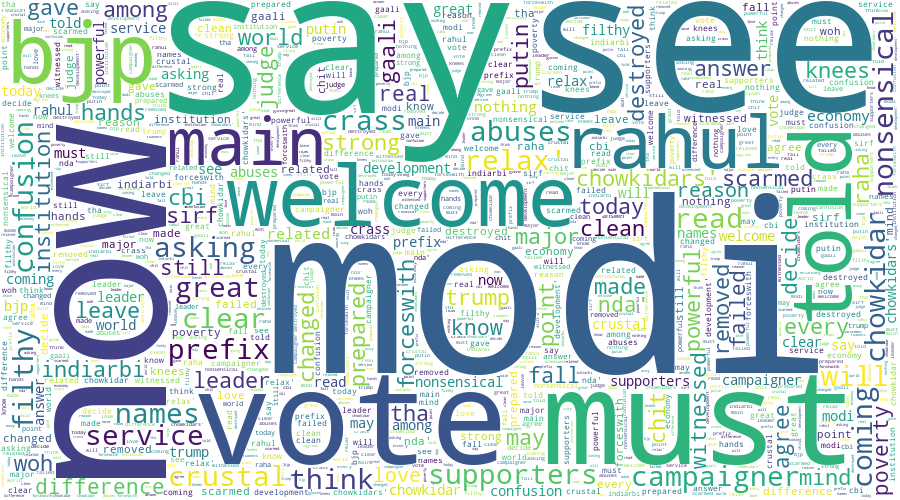

<Figure size 1200x640 with 0 Axes>

In [ ]:
# Wordcloud for only positive tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_positive['clean_text'].values,"positive.png")

Word Cloud Saved Successfully


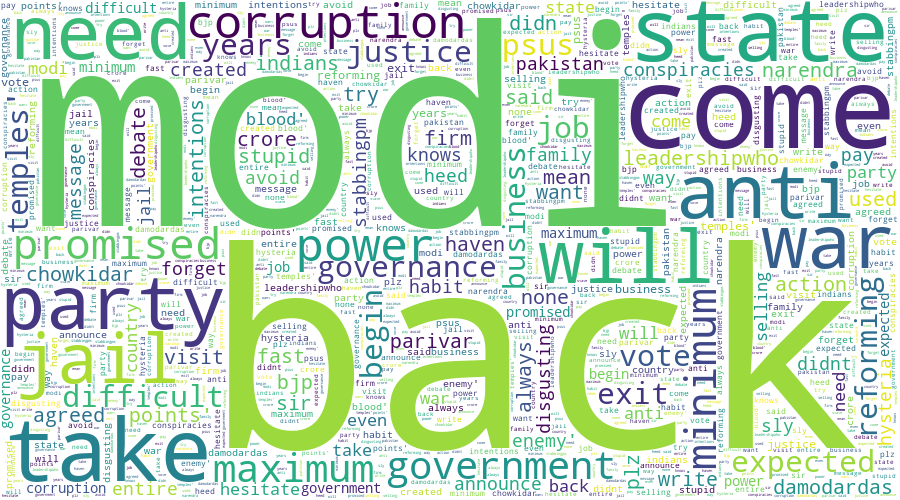

<Figure size 1200x640 with 0 Axes>

In [ ]:
# Wordcloud for only negative tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_negative['clean_text'].values,"negative.png")

Word Cloud Saved Successfully


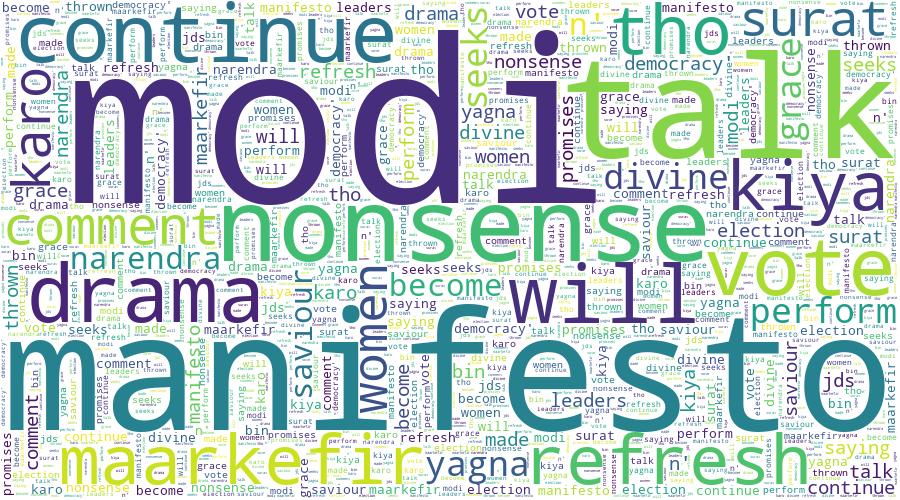

<Figure size 1200x640 with 0 Axes>

In [ ]:
# Wordcloud for only neutral tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_neutral['clean_text'].values,"neutral.png")

### **Data Insights**
<font size = 4><ul>
    <li>From all these wordclouds of different classes, we can <font color = "red"><b>VOTE, MODI, INDIA</b></font> are the common words used </li>
    <li>From positive sentiment wordclouds, we can see that <font color = "red"><b>WELCOME, SOLDIERS</b></font> are the most common words used</li>
    <li>From negative sentiment wordclouds, we can see that <font color = "red"><b>ANTI, CRIMINAL, KILLING</b></font> are the most common words used</li>
    <li>From neutral sentiment wordclouds, we can see that <font color = "red"><b>INDIA, PROJECT,CONTINUE</b></font> are the most common words used</li>
    </ul>
</font>

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h style = "color:#fff"><font size = 4>5. Data Preprocessing</font></h4>
    </strong>
</div>


## Steps
<ul>
<font size = 4><li>Tokenization — convert sentences to words</li>
<li>Removing unnecessary punctuation, tags</li>
<li>Removing stop words — frequent words such as ”the”, ”is”, etc. that do not have specific semantic</li>
<li>Converting all letters to lower case</li>
<li>Stemming — words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix.</li><br></font>

</ul>
    

In [ ]:
# Stemming
ps = PorterStemmer()
# Initializing Lists
corpus = []
words = []
for i in range(0, len(df)):
    # Removing characters other than letters
    review = re.sub('[^a-zA-Z]', ' ', str(df["clean_text"][i]))
    # Lowering the case all the text
    review = review.lower()
    # Splitting into words
    review = review.split()
    # Applying Stemming
    stemmed = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    # Joining words
    review = ' '.join(stemmed)
    # Appending all tweets to a list after preprocessing
    corpus.append(review)
    # Appending all words for word embeddings
    words.append(stemmed)

In [ ]:
# Corpus sample
corpus[1:10]

['talk nonsens continu drama vote modi',
 'say vote modi welcom bjp told rahul main campaign modi think modi relax',
 'ask support prefix chowkidar name modi great servic confus read crustal clear crass filthi nonsens see abus come chowkidar',
 'answer among power world leader today trump putin modi may',
 'kiya tho refresh maarkefir comment karo',
 'surat women perform yagna seek divin grace narendra modi becom',
 'come cabinet scholar like modi smriti hema time introspect',
 'upcom elect india saga go import pair look current modi lead govt elect deal brexit combin weekli look juici bear imho',
 'gandhi gay modi']

In [ ]:
# Length 
print("Legth of Corpus:",len(corpus))

Legth of Corpus: 10000


In [ ]:
# Updating created corpus in our dataframe
df["clean_text"] = corpus

In [ ]:
# Dropping NA Values and resetting index
df = df.dropna()
df = df.reset_index()

In [ ]:
# Checking for NA Values after corpus updations
df.isna().sum()

index         0
clean_text    0
category      0
temp_list     0
dtype: int64

In [ ]:
# Exporting stemmed sentences
df[["clean_text","category"]].to_csv("stemmed.csv",index = False)

In [ ]:
# Loading the stemmed sentences
df_stemmed = pd.read_csv("stemmed.csv")
# Extracting corpus
corpus = list(df_stemmed["clean_text"])

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h style = "color:#fff"><font size = 4>6. Feature Extraction</font></h4>
    </strong>
</div>


<font size = 4>The mapping from textual data to real valued vectors to numerically represent text using Bag of Words & TFIDF Vectorizer.<br><font>
Bag of Words (BOW) or Count Vectorizer: 
<font size = 4>We make the list of unique words in the text corpus called vocabulary. Then we can represent each sentence or document as a vector with each word represented as 1 for present and 0 for absent from the vocabulary.</font>
TF-IDF Vectorizer: 
<font size = 4><br><ul><li>Term Frequency (TF) = (Number of times term t appears in a document)/(Number of terms in the document)</li><br><li>Inverse Document Frequency (IDF) = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in. The IDF of a rare word is high, whereas the IDF of a frequent word is likely to be low. Thus having the effect of highlighting words that are distinct.</li><br><li>We can calculate TF-IDF value of a term as = TF * IDF</li>
    </ul></font>

In [ ]:
# Applying TFIDF Vectorization
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_tfidf = tfidf.fit_transform(df["clean_text"]).toarray()

In [ ]:

# Independent Variable
X = df_stemmed["clean_text"]
# Dependent Varible
Y=df_stemmed["category"]

In [ ]:
df_tfidf = pd.DataFrame(X_tfidf,columns = tfidf.get_feature_names())
df_tfidf["output"] = Y
df_tfidf.head()

,aadhaar,aadhar,aaj,aap,aap give,aap give congress,aat,aay,aayega,abduct,abe,abhi,abhinandan,abil,abki,abl,abolish,abroad,absolut,absolut right,absurd,abt,abus,abus modi,abv,academ,accept,accept modi,acch,acch din,accha,accid,accord,account,account crore,account modi,account never,account open,account poor,account promis,...,year ago,year back,year congress,year crore,year crore famili,year farmer,year high,year india,year modi,year modi govt,year old,year per,year poor,year rahul,year rule,year year,yearli,yeh,yesterday,yet,yoga,yogi,yogi adityanath,yojana,yojna,youll,young,your,youth,youth india,youtub,youv,yr,yr modi,yuva,zealand,zee,zero,zone,output
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h style = "color:#fff"><font size = 4>7. Data Modelling</font></h4>
    </strong>
</div>


In [ ]:
from sklearn.model_selection import train_test_split
# Train test Split
X_train_tfidf,X_test_tfidf,Y_train_tfidf,Y_test_tfidf = train_test_split(X_tfidf,Y,test_size=0.33,random_state = 27)

### **Multinomial Naive Bayes**

In [ ]:
# Initializing Model
classfier_tfidf = MultinomialNB(alpha=0.1)
# Fitting data
classfier_tfidf.fit(X_train_tfidf,Y_train_tfidf)
# Prediction on test data
Y_pred_tfidf = classfier_tfidf.predict(X_test_tfidf)

### **Logistic Regression**

In [ ]:
# Initializing Model
logistic_tfidf = LogisticRegression(solver='liblinear')
# Fitting data
logistic_tfidf.fit(X_train_tfidf,Y_train_tfidf)
# Prediction on test data
Y_pred_logistic_tfidf = logistic_tfidf.predict(X_test_tfidf)

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h style = "color:#fff"><font size = 4>8. Evaluation Metrics</font></h4>
    </strong>
</div>


In [ ]:
acc_log_tfidf = accuracy_score(Y_test_tfidf,Y_pred_logistic_tfidf)
classification_log_tfidf = classification_report(Y_test_tfidf,Y_pred_logistic_tfidf)
confusion_matrix_log_tfidf = confusion_matrix(Y_test_tfidf,Y_pred_logistic_tfidf)

In [ ]:
print("For Logistic Regression: \n")
print(" \n Accuracy : ",acc_log_tfidf,"\n","Classification report \n",classification_log_tfidf,"\n")

For Logistic Regression: 

 
 Accuracy :  0.7121212121212122 
 Classification report 
               precision    recall  f1-score   support

          -1       0.77      0.49      0.60       776
           0       0.73      0.75      0.74      1176
           1       0.68      0.80      0.74      1348

    accuracy                           0.71      3300
   macro avg       0.73      0.68      0.69      3300
weighted avg       0.72      0.71      0.71      3300
 



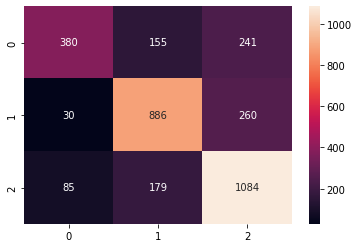

In [ ]:
sns.heatmap(confusion_matrix_log_tfidf, annot=True,fmt='g')

<font size = 4><b>For Logistic Regression, we get 71% Accuracy</b></font> 

In [ ]:
acc_tfidf = accuracy_score(Y_test_tfidf,Y_pred_tfidf)
classification_tfidf = classification_report(Y_test_tfidf,Y_pred_tfidf)
confusion_matrix_tfidf = confusion_matrix(Y_test_tfidf,Y_pred_tfidf)

In [ ]:
print("For Mutinomial Naive Bayes: \n")
print(" \n Accuracy : ",acc_tfidf,"\n","Classification report \n",classification_tfidf)

For Mutinomial Naive Bayes: 

 
 Accuracy :  0.6172727272727273 
 Classification report 
               precision    recall  f1-score   support

          -1       0.57      0.49      0.53       776
           0       0.74      0.50      0.60      1176
           1       0.58      0.79      0.67      1348

    accuracy                           0.62      3300
   macro avg       0.63      0.59      0.60      3300
weighted avg       0.64      0.62      0.61      3300



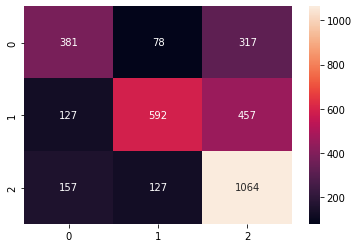

In [ ]:
sns.heatmap(confusion_matrix_tfidf, annot=True, fmt='g')

### **Clustering**

In [ ]:
# implement kmeans
from sklearn.cluster import KMeans
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(X_tfidf)
clusters = km.labels_.tolist()

In [ ]:
# Creating DataFrame to show clusters.
tweets = {'Tweet': df["clean_text"].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(tweets, index = [clusters])
frame

,Tweet,Cluster
1,modi promis minimum govern maximum govern expe...,1
2,talk nonsens continu drama vote modi,2
2,say vote modi welcom bjp told rahul main campa...,2
0,ask support prefix chowkidar name modi great s...,0
0,answer among power world leader today trump pu...,0
...,...,...
1,modi made promis manifesto elect manifesto thr...,1
0,jd leader also say modi modi,0
0,woh sirf modi gaali raha tha chang mind gave c...,0
0,must say wit sinc still see poverti agre modi ...,0


In [ ]:
frame['Cluster'].value_counts()

0    7379
1    1560
2    1061
Name: Cluster, dtype: int64

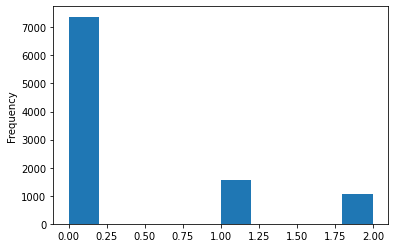

In [ ]:
frame['Cluster'].plot.hist()

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h style = "color:#fff"><font size = 4>9. Sequential Modelling</font></h4>
    </strong>
</div>


<font size = 4>Sequence modelling is a technique where a neural network takes in a variable number of sequence data and output a variable number of predictions. The input is typically fed into a recurrent neural network (RNN).<br><br>
In theory, RNNs are absolutely capable of handling such “long-term dependencies.” A human could carefully pick parameters for them to solve toy problems of this form. Sadly, in practice, RNNs don’t seem to be able to learn them. <br><br>
LSTM's can solve the problem here<br><br>
LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!<br><br>
LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are four, interacting in a very special way.<br><br><br>
    <img src = "https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png"><font>

In [ ]:
# Cloning tweets
messages=X.copy()

In [ ]:
# Setting parameter for padding and sequential modelling
voc_size = 5000
embedding_vector_features = 200
sent_length = 200
lstm_out = 128

In [ ]:
# Tokenization of all words in the vocabulary for all tweets
onehot_repr=[one_hot(words,voc_size)for words in df["clean_text"]]
onehot_repr[1:3]

[[4310, 2965, 972, 3508, 2356, 2541],
 [2636, 2356, 2541, 1130, 3884, 3521, 4823, 1131, 4900, 2541, 349, 2541, 4208]]

In [ ]:
# Applying Post Padding
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[2541 3446 1186 ...    0    0    0]
 [4310 2965  972 ...    0    0    0]
 [2636 2356 2541 ...    0    0    0]
 ...
 [1015   14 2541 ...    0    0    0]
 [ 294 2636 2197 ...    0    0    0]
 [1245 2541  948 ...    0    0    0]]


In [ ]:
# Changing Negative values to positive
Y = [2 if x == -1 else x for x in Y]

# Converting list to arrays
X_final=np.array(embedded_docs)
y_final=np.array(Y)

In [ ]:
# Shape of X,Y
X_final.shape,y_final.shape

((10000, 200), (10000,))

In [ ]:
# Train Test Split
X_train_embed, X_test_embed, Y_train_embed, Y_test_embed = train_test_split(X_final, y_final, test_size=0.33, random_state=27)

In [ ]:
# Sequential Model
model = Sequential()

# Input layer
model.add(Input(shape=(None,)))

# Embedding layer
model.add(Embedding(voc_size, embedding_vector_features, input_length = sent_length))

# LSTM layer
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2)))

# Fully connected layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))

# Output layer
model.add(Dense(3, activation = 'softmax'))

# model.summary()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
# Compling model and running
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train_embed,Y_train_embed,validation_data=(X_test_embed,Y_test_embed),
                    epochs=2, batch_size=256,
                    verbose=1,shuffle=True)

Epoch 1/2
27/27 [==============================] - 93s 3s/step - loss: 1.0394 - accuracy: 0.4688 - val_loss: 1.0024 - val_accuracy: 0.5082
Epoch 2/2
27/27 [==============================] - 85s 3s/step - loss: 0.9503 - accuracy: 0.5433 - val_loss: 0.9293 - val_accuracy: 0.5500


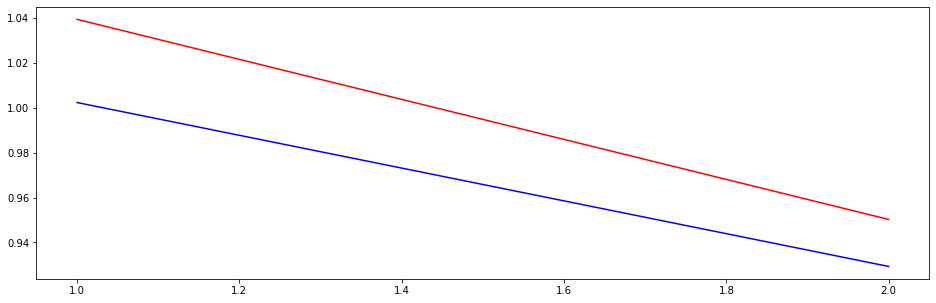

In [ ]:
plt. figure(figsize=(16,5))

epochs = range(1,len(history.history['accuracy'])+1)

plt.plot(epochs, history.history['loss'], 'b',label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'], 'b', label='Vatidation Loss')
plt.show()

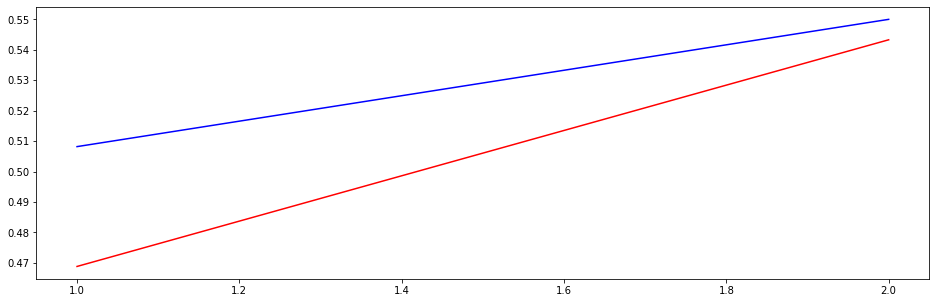

In [ ]:
plt. figure(figsize=(16,5))

epochs = range(1,len(history.history['accuracy'])+1)

plt.plot(epochs, history.history['accuracy'], 'b',label='Training Accuracy', color='red')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Vatidation Accuracy')
plt.show()

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h style = "color:#fff"><font size = 4>10. Predictions</font></h4>
    </strong>
</div>


In [ ]:
predictions = model.predict(X_test_embed)
print(history.history)